In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv("example_retail_sales.csv",index_col=['ds'])

In [42]:
data.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


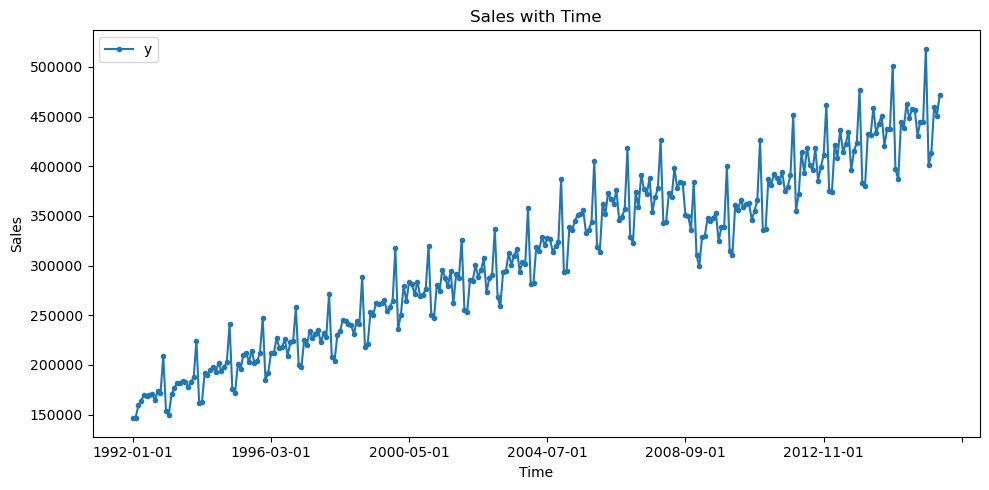

In [43]:
fig,ax=plt.subplots(figsize=[10,5])
data.plot(marker=".",ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
ax.set_title("Sales with Time")
plt.tight_layout()

# Computing Moving Avarages

In [44]:
window_size=3;
mA3=data.rolling(window=window_size,center=True).mean()
mA3.rename(columns={"y":"3_MA"},inplace=True)

In [45]:
mA3.head()

,3_MA
ds,
1992-01-01,NaN
1992-02-01,150930.333333
1992-03-01,156694.666667
1992-04-01,164357.666667
1992-05-01,167466.666667


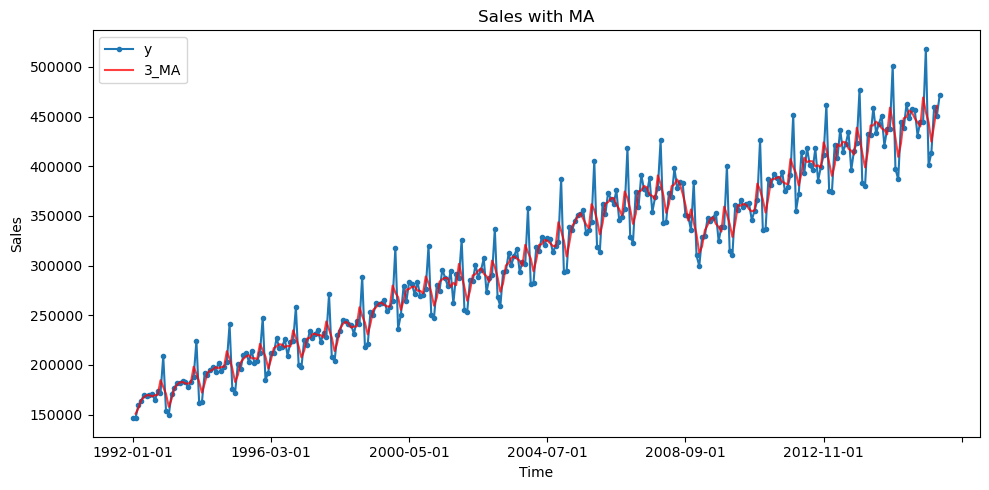

In [46]:
fig,ax=plt.subplots(figsize=[10,5])
data.plot(marker=".",ax=ax)
mA3.plot(ax=ax,color="red",alpha=0.75)
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
ax.set_title("Sales with MA")
plt.tight_layout()

# Moving avarages for the even window 

In [47]:
dff=data.copy()

In [48]:
dff["ma4"]=dff.rolling(window=4).mean()
dff["2*ma4"]=dff["ma4"].rolling(window=2).mean()
dff["Result"]=dff["2*ma4"].shift(-2)

In [49]:
dff.head()

,y,ma4,2*ma4,Result
ds,,,,
1992-01-01,146376,NaN,NaN,NaN
1992-02-01,147079,NaN,NaN,NaN
1992-03-01,159336,NaN,NaN,157076.50
1992-04-01,163669,154115.0,NaN,162736.00
1992-05-01,170068,160038.0,157076.5,166753.25


In [52]:
window_size=12
ma2x12=(data.rolling(window=window_size).mean().rolling(window=2).mean().shift(-window_size//2))
ma2x12.rename(columns={"y":"2x12_MA"},inplace=True)

In [54]:
ma2x12.head(12)

,2x12_MA
ds,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,168127.041667
1992-08-01,168537.583333
1992-09-01,169125.541667


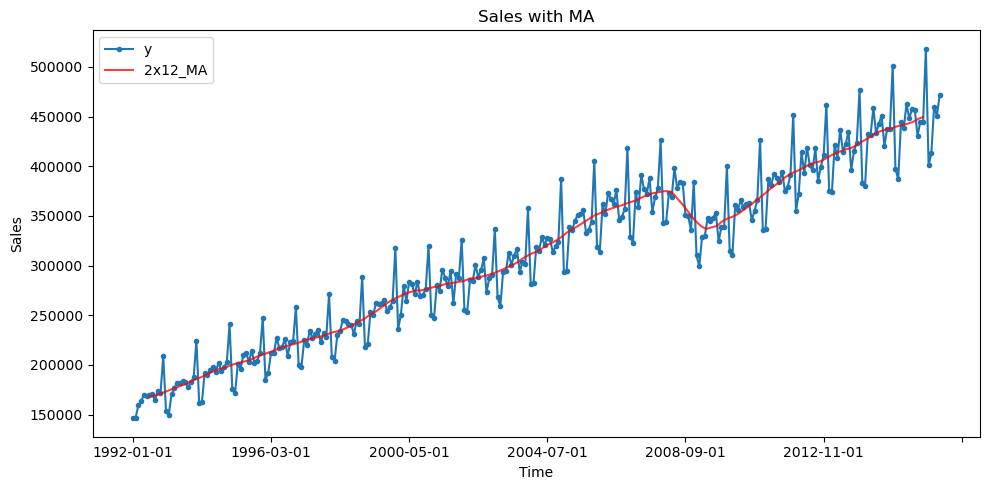

In [55]:
fig,ax=plt.subplots(figsize=[10,5])
data.plot(marker=".",ax=ax)
ma2x12.plot(ax=ax,color="red",alpha=0.75)
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
ax.set_title("Sales with MA")
plt.tight_layout()

In [ ]:
# we can crearly obtain the treand line moving upward.